In [1]:
import pandas as pd
import os,sys, imp, glob
sys.path.append('./src/')
import doc_utils_clean as doc_utils
import feature_utils, common_utils
import defines
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dir_name="recalc_tfidf"

In [3]:
merged_db = common_utils.concat_dbs(dir_name,"merged_db")
merged_db.head()

,doc_idx,merged_idx,is_question,is_nar,par_idx_in_doc,sent_len,is_client,sent_idx_in_par,sent_pos_in_par,sent_pos_in_doc,...,f_per_3,f_per_A,f_tense_BEINONI,f_tense_FUTURE,f_tense_IMPERATIVE,f_tense_PAST,POSTAG_NEG,POSTAG_TTL,POSTAG_yyCM,POSTAG_NNPT
0,1,0,0.000000,0.000000,0.000000,47.000000,0,0,1.000000,0.001724,...,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1,1,1,0.000000,0.000000,1.000000,2.000000,1,0,1.000000,0.003448,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
2,1,2,1.000000,0.000000,2.000000,15.000000,0,0,1.000000,0.005172,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
3,1,3,0.000000,0.000000,3.000000,8.000000,1,0,1.000000,0.006897,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
4,1,4,0.000000,0.000000,4.000000,19.000000,0,0,1.000000,0.008621,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN


<Figure size 1080x576 with 0 Axes>

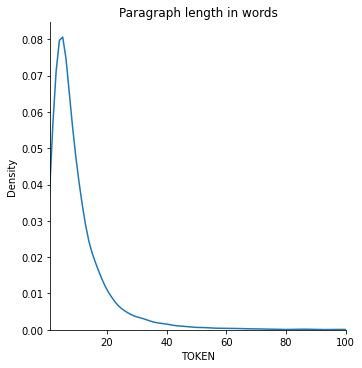

In [16]:
plt.figure(figsize = (15,8))
par_len_words = merged_db.groupby(['doc_idx','merged_idx','par_idx_in_doc'])
par_len_sns =  sns.displot(data=merged_db,
                            x='TOKEN',
                            kind='kde',
                            common_norm=False
                           )
par_len_sns.set(title="Paragraph length in words",xlim=((1,100)))

<Figure size 576x1080 with 0 Axes>

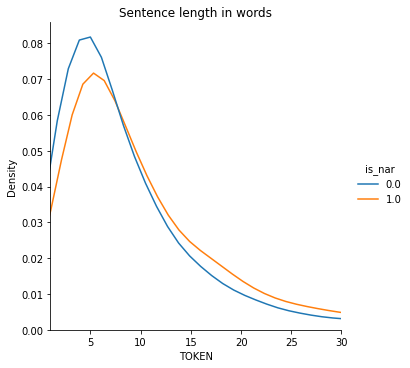

In [17]:
plt.figure(figsize = (8,15))
sent_len_words = merged_db.groupby(['doc_idx','merged_idx'])
sent_len_sns =  sns.displot(data=merged_db,
                            x='TOKEN',
                            kind='kde',
                            hue='is_nar',
                            common_norm=False
                           )
sent_len_sns.set(title="Sentence length in words",xlim=((1,30)))

In [18]:
imp.reload(feature_utils)
sent_db = common_utils.concat_dbs(dir_name,"sent_db",defines.SENT_FEATURES)
sent_db

,doc_idx,sent_idx,is_question,is_nar,par_idx_in_doc,sent_len,is_client,sent_idx_in_par,sent_pos_in_par,sent_pos_in_doc
0,1,0,0.000000,0.000000,0.000000,47.000000,0,0,1.000000,0.001724
1,1,1,0.000000,0.000000,1.000000,2.000000,1,0,1.000000,0.003448
2,1,2,1.000000,0.000000,2.000000,15.000000,0,0,1.000000,0.005172
3,1,3,0.000000,0.000000,3.000000,8.000000,1,0,1.000000,0.006897
4,1,4,0.000000,0.000000,4.000000,19.000000,0,0,1.000000,0.008621
...,...,...,...,...,...,...,...,...,...,...
36319,80,486,0.000000,0.000000,222.000000,21.000000,1,3,0.666667,0.991853
36320,80,487,0.000000,0.000000,222.000000,27.000000,1,4,0.833333,0.993890
36321,80,488,0.000000,0.000000,222.000000,23.000000,1,5,1.000000,0.995927
36322,80,489,1.000000,0.000000,223.000000,19.000000,0,0,1.000000,0.997963


In [19]:
doc_stat_db = pd.DataFrame()

def get_doc_statistic(doc_idx):
    sent_db = pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_sent_db.csv".format(i)),usecols=['is_nar','nar_idx','sent_len','is_client'])
    nar_num = sent_db['nar_idx'].nunique()
    avrg_sent_len_nar = sent_db.query('is_nar == 1')['sent_len'].mean()
    groupby(['doc_idx'])['nar_idx'].nunique()
    del sent_db

In [20]:
sent_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36324 entries, 0 to 36323
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   doc_idx          36324 non-null  int64  
 1   sent_idx         36324 non-null  int64  
 2   is_question      36324 non-null  float64
 3   is_nar           36324 non-null  float64
 4   par_idx_in_doc   36324 non-null  float64
 5   sent_len         36324 non-null  float64
 6   is_client        36324 non-null  int64  
 7   sent_idx_in_par  36324 non-null  int64  
 8   sent_pos_in_par  36324 non-null  float64
 9   sent_pos_in_doc  36324 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 2.8 MB


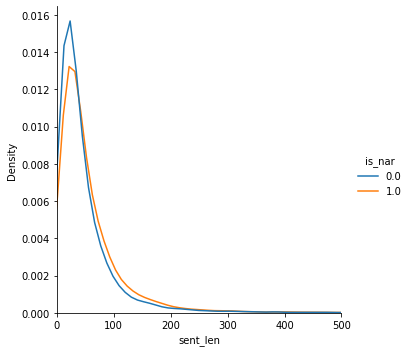

In [21]:
sent_len = sns.displot(data=sent_db,
                       x='sent_len',
                       hue='is_nar',
                       kind='kde',
                       common_norm=False,  # Normalize each distribution independently
                      )
sent_len.set(xlim=(0, 500))

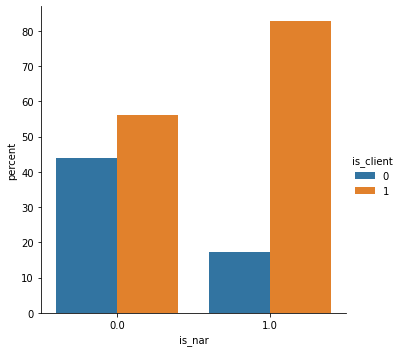

In [22]:
x,y = 'is_nar', 'is_client'

(sent_db
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

In [24]:
par_db = common_utils.concat_dbs(dir_name,"par_db",['par_len','par_type','is_nar'])
par_db

,doc_idx,par_idx,par_len,par_type,is_nar
0,1,0,49.000000,therapist,0.000000
1,1,1,3.000000,client,0.000000
2,1,2,17.000000,therapist,0.000000
3,1,3,14.000000,client,0.000000
4,1,4,22.000000,therapist,0.000000
...,...,...,...,...,...
15063,80,220,132.000000,client,0.000000
15064,80,221,97.000000,therapist,0.000000
15065,80,222,371.000000,client,0.000000
15066,80,223,20.000000,therapist,0.000000


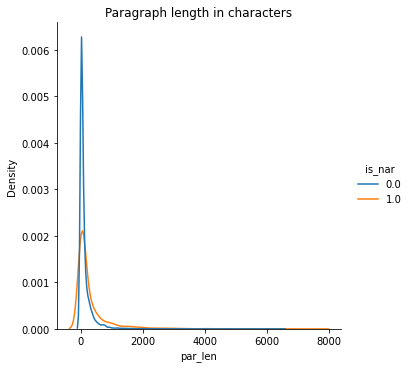

In [25]:
par_len_char = sns.displot(data=par_db,
                       x='par_len',
                       hue='is_nar',
                       kind='kde',
                       common_norm=False,  # Normalize each distribution independently
                      )
par_len_char.set(title='Paragraph length in characters')

### Chek distrib of par len in sentences

In [26]:
sent_db

,doc_idx,sent_idx,is_question,is_nar,par_idx_in_doc,sent_len,is_client,sent_idx_in_par,sent_pos_in_par,sent_pos_in_doc
0,1,0,0.000000,0.000000,0.000000,47.000000,0,0,1.000000,0.001724
1,1,1,0.000000,0.000000,1.000000,2.000000,1,0,1.000000,0.003448
2,1,2,1.000000,0.000000,2.000000,15.000000,0,0,1.000000,0.005172
3,1,3,0.000000,0.000000,3.000000,8.000000,1,0,1.000000,0.006897
4,1,4,0.000000,0.000000,4.000000,19.000000,0,0,1.000000,0.008621
...,...,...,...,...,...,...,...,...,...,...
36319,80,486,0.000000,0.000000,222.000000,21.000000,1,3,0.666667,0.991853
36320,80,487,0.000000,0.000000,222.000000,27.000000,1,4,0.833333,0.993890
36321,80,488,0.000000,0.000000,222.000000,23.000000,1,5,1.000000,0.995927
36322,80,489,1.000000,0.000000,223.000000,19.000000,0,0,1.000000,0.997963


In [28]:
par_len_count = sent_db.groupby(['doc_idx','par_idx_in_doc'])['sent_idx'].count()
par_len_count

doc_idx  par_idx_in_doc
1        0.000000          1
         1.000000          1
         2.000000          1
         3.000000          1
         4.000000          1
                          ..
80       220.000000        3
         221.000000        2
         222.000000        6
         223.000000        1
         224.000000        1
Name: sent_idx, Length: 14918, dtype: int64

In [29]:
par_len_count.describe()

count   14918.000000
mean        2.434911
std         3.717304
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       111.000000
Name: sent_idx, dtype: float64

In [30]:
# find par with max length
par_len_count.idxmax(),par_len_count.max()

((5, 19.0), 111)

In [31]:
par_len_count.reset_index(drop=True).median()

1.0

In [32]:
par_len_count.quantile(q=0.95)

8.0

In [33]:
par_len_count.quantile(q=0.5)

1.0

In [34]:
par_len_count.quantile(q=0.75)

2.0

<Figure size 1080x576 with 0 Axes>

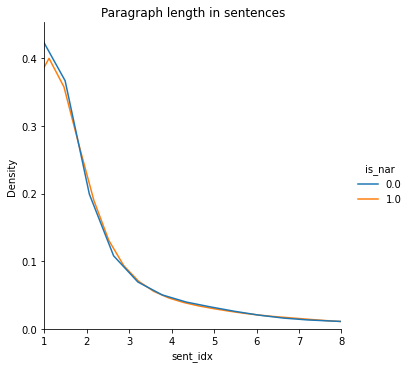

In [35]:
plt.figure(figsize = (15,8))
par_len_sent =  sns.displot(data=sent_db,x=par_len_count.reset_index(drop=True),
                            kind='kde',
                            hue='is_nar',
                            common_norm=False
                           )
par_len_sent.set(title="Paragraph length in sentences",xlim=((1,8)))

[Text(0.5, 1.0, 'Paragraph length in sentences')]

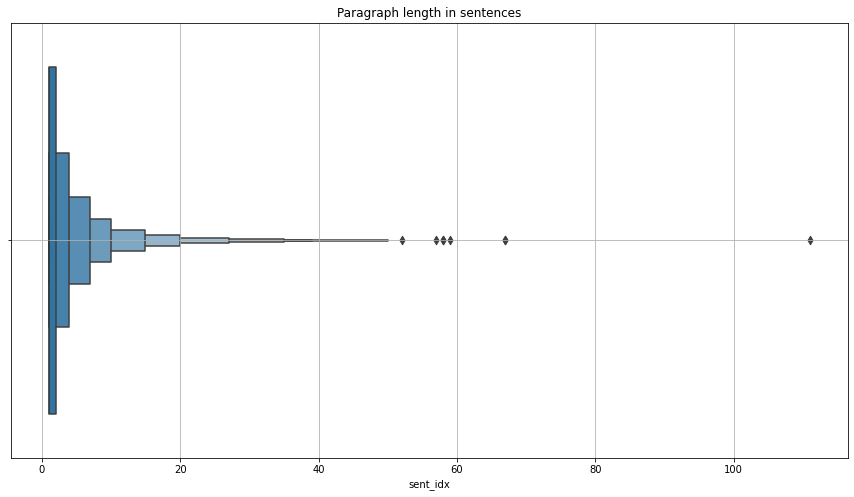

In [36]:
plt.figure(figsize = (15,8))
par_len_sent_b = sns.boxenplot(data=sent_db,
                               x=par_len_count.reset_index(drop=True),
                               hue='is_nar')
par_len_sent_b.grid()
par_len_sent_b.set(title="Paragraph length in sentences")

## Build word cloud